# Capstone Project 2: Model building

We have cleaned the data. Now it is the time to build models.

We will test different modeling methods and compare them.

The dataset is download from Kaggle. It is about house price. The goal will be use this dataset and build a predictive model for house pricing.

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

## The objective 
The objective of this project would be building a predictive model for house pricing. The result can be used to negotiate house price.
The modeling method can be logistic regression, random forest, gradient boosting, and SVM...
And compare them and pick the best performance one for prediction

In [1]:
!pip install xgboost

### STEP1: Load the tools

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost
#from xgboost import XBGRegressor
from sklearn.linear_model import ElasticNet

import pickle

from sklearn.metrics import r2_score, mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### STEP2: Load the dataset

In [3]:
# load the data for training validate and the model
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [4]:
X_train = X_train.drop(columns=['Unnamed: 0']).values
X_test = X_test.drop(columns=['Unnamed: 0']).values

In [5]:
y_train = y_train.drop(columns=['Unnamed: 0']).values
y_test = y_test.drop(columns=['Unnamed: 0']).values

### STEP5: Modeling

In [6]:
### this dictionary will be used to save all the RMSE scores of using different regression method.
score = {}

#### 5.1 Logistic regression

In [7]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [8]:
R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred, squared=True)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

R2 score is 0.6861941384072454
MSE score is 1607625937.1583333
RMSE score is 40095.21090053441


In [9]:
score['logistic'] = 36366.42724508722
print (score)

{'logistic': 36366.42724508722}


#### 5.2 Ridge regression

##### For the Ridge method, alpha is a parameter needed to be tuned. I am using the GridSearch method to find the best alpha for this modeling

In [10]:
rr = Ridge()
param = {'alpha': [0.5, 1.0, 1.5, 2.0, 3.0, 5.0, 8, 10, 15, 20]}
rr_cv = GridSearchCV(rr, param, cv=5)
rr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.5, 1.0, 1.5, 2.0, 3.0, 5.0, 8, 10, 15,
                                   20]})

In [11]:
print("Best Score:" + str(rr_cv.best_score_))
print("Best Parameters: " + str(rr_cv.best_params_))

Best Score:0.8596310495142314
Best Parameters: {'alpha': 15}


In [12]:
y_pred = rr_cv.predict(X_test)

R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred, squared=True)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

R2 score is 0.8062513475239872
MSE score is 992573425.5854505
RMSE score is 31505.13332118197


In [13]:
score['ridge'] = 26946
print (score)

{'logistic': 36366.42724508722, 'ridge': 26946}


#### 5.3 Lasso regression

In [14]:
lr = Lasso()
param = {'alpha': 600+10*np.arange(10)}
lr_cv = GridSearchCV(lr, param, cv=5)
lr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([600, 610, 620, 630, 640, 650, 660, 670, 680, 690])})

##### I tuned the alpha parameter to get the best socre.

In [15]:
print("Best Score:" + str(lr_cv.best_score_))
print("Best Parameters: " + str(lr_cv.best_params_))

Best Score:0.8622923855972326
Best Parameters: {'alpha': 690}


In [16]:
y_pred = lr_cv.predict(X_test)

R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred, squared=True)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

R2 score is 0.8069771170853558
MSE score is 988855311.5727483
RMSE score is 31446.069890731153


In [17]:
score['lasso'] = 26783.751354683114
print (score)

{'logistic': 36366.42724508722, 'ridge': 26946, 'lasso': 26783.751354683114}


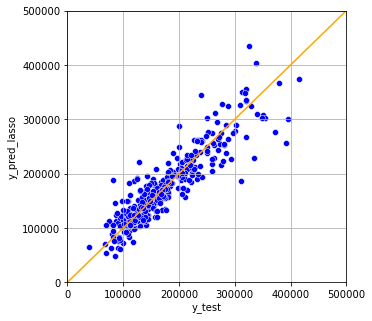

In [18]:
plt.figure(figsize=(5, 5))
sns.scatterplot(y_test[:, 0], y_pred, color = 'blue');
plt.plot([0, 500000], [0, 500000], color = 'orange')
plt.xlabel('y_test')
plt.ylabel('y_pred_lasso')
plt.xlim(0, 500000)
plt.ylim(0, 500000)
plt.grid()

#### From the above plot, we can see the prediction results is pretty good. 

#### 5.4. SVR

In [19]:
svr = SVR()
params = {'C': 200000+50000*(1+np.arange(10)), 'epsilon': 200*(1+np.arange(10))}
svr_cv = GridSearchCV(svr, params, cv=5)
svr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': array([250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000,
       650000, 700000]),
                         'epsilon': array([ 200,  400,  600,  800, 1000, 1200, 1400, 1600, 1800, 2000])})

In [20]:
print("Best Score:" + str(svr_cv.best_score_))
print("Best Parameters: " + str(svr_cv.best_params_))

Best Score:0.7898382929517856
Best Parameters: {'C': 300000, 'epsilon': 2000}


In [21]:
y_pred = svr_cv.predict(X_test)

R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred, squared=True)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

R2 score is 0.8047774778686757
MSE score is 1000124052.8230784
RMSE score is 31624.737988212302


In [22]:
score['svr'] = 30167.047887518962
print (score)

{'logistic': 36366.42724508722, 'ridge': 26946, 'lasso': 26783.751354683114, 'svr': 30167.047887518962}


#### 5.5. Random Forest

In [ ]:
rfr = RandomForestRegressor()
params = {'n_estimators': 650+ 10*(1+np.arange(10))}
rfr_cv = GridSearchCV(rfr, params, cv=5)
rfr_cv.fit(X_train, y_train)

In [ ]:
print("Best Score:" + str(rfr_cv.best_score_))
print("Best Parameters: " + str(rfr_cv.best_params_))

In [ ]:
y_pred = rfr_cv.predict(X_test)

R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred, squared=True)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

In [ ]:
score['random_forest'] = 27181.81616853467
print (score)

#### 5.6 XGBoost

In [ ]:
xgbr = xgboost.XGBRegressor(objective='reg:linear')
params = {'n_estimators': 10*(1+np.arange(10))}
xgbr_cv = GridSearchCV(xgbr, params, cv=5)
xgbr_cv.fit(X_train, y_train)

In [ ]:
print("Best Score:" + str(xgbr_cv.best_score_))
print("Best Parameters: " + str(xgbr_cv.best_params_))

In [ ]:
y_pred = xgbr_cv.predict(X_test)

R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred, squared=True)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

In [ ]:
score['xgboost'] = 28544.242354555445
print (score)

##### Next we are goign to test another way of using XGBoost. Firstly we need to convert the data to dmatrix by xgboost.DMatrix

In [ ]:
# convert the train and test data to dmatrix
train_dmatrix = xgboost.DMatrix(data=X_train, label=y_train)
test_dmatrix = xgboost.DMatrix(data=X_test, label=y_test)

param = {'booster': 'gblinear', 'objective': 'reg:linear'}

xg_score=[]
for i in range(1, 10):
    xgb_r = xgboost.train(params=param, dtrain=train_dmatrix, num_boost_round=i)
    y_pred = xgb_r.predict(test_dmatrix)
    #R2 = r2_score(y_test, y_pred)
    #MSE = mean_squared_error(y_test, y_pred, squared=True)
    RMSE = mean_squared_error(y_test, y_pred, squared=False)
    xg_score.append(RMSE)    
    
print(xg_score)
    
#print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

In [ ]:
plt.plot(np.arange(1, 10), xg_score)
plt.xlabel('num_boost_round')
plt.ylabel('RMSE')
plt.show()

The best 'num_boost_round' is 5

In [ ]:
xgb_r = xgboost.train(params=param, dtrain=train_dmatrix, num_boost_round=5)
y_pred = xgb_r.predict(test_dmatrix)
R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred, squared=True)
RMSE = mean_squared_error(y_test, y_pred, squared=False)

print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

In [ ]:
score['xgboost_dmatrix'] = 26653.17599397943
print (score)

### 5.7 ElasticNet

In [ ]:
en = ElasticNet()
params = {'alpha': [650, 700, 750], 'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]}
en_cv = GridSearchCV(en, params, cv=5)
en_cv.fit(X_train, y_train)

###### The best l1_ratio is 1. So l2 norm is used for the penalty term. I guess it should be similar as Ridge method. 

In [ ]:
print("Best Score:" + str(en_cv.best_score_))
print("Best Parameters: " + str(en_cv.best_params_))

In [ ]:
y_pred = en_cv.predict(X_test)
R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred, squared=True)
RMSE = mean_squared_error(y_test, y_pred, squared=False)

print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

In [ ]:
score['ElasticNet'] = 26779.383486667426
print (score)

### STEP6. Compare the models

In [ ]:
df_score = pd.DataFrame(score.items())

In [ ]:
df_score.columns = ['Method', 'RMSE']

In [ ]:
plt.figure(figsize=(12, 4))
sns.barplot(df_score.Method, df_score.RMSE)
plt.grid()
plt.ylim(15000, 40000)
plt.show()

The above RMSE plot shows that Ridge, Lasso, Random Forest, XGBoost_dmatrix, and ElasticNet all have similar error.

Next I am going to use Lasso and xgboost_dmatrix method to run the prediction.

In [ ]:
filename = 'lasso_model.sav'
pickle.dump(lr_cv, open(filename, 'wb'))

In [ ]:
filename = 'xgboost_dmatrix_model.sav'
pickle.dump(xgb_r, open(filename, 'wb'))

### Summary 

For this linear regression problem, I use several methods and compare the results. They all return similar result except 'logistic' and 'svr' method. 

The indepedent and response variables are original values, and not transformed to log format.